In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.pipeline import  Pipeline
import datetime as dt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
class Config():
    def __init__(self):
        self.basePath = '/content/gdrive/My Drive/AIML/FineWindyDay/dataset'
        self.trainCsv = 'train.csv'
        self.testCsv = 'test.csv'
        self.submissionCsv= 'sample_submission.csv'

In [4]:
config_ = Config()

**Load data**

In [5]:
def load_data(path):
    df = pd.read_csv(path)
    return df

In [6]:
trainDataPath = os.path.join(config_.basePath,config_.trainCsv)
testDataPath = os.path.join(config_.basePath,config_.testCsv)
train_data = load_data(trainDataPath)
test_data = load_data(testDataPath)

In [7]:
train_data.head()

tracking_id  ... windmill_generated_power(kW/h)
0    WM_33725  ...                       6.766521
1      WM_698  ...                       5.966275
2    WM_39146  ...                       2.874342
3     WM_6757  ...                      14.851089
4    WM_21521  ...                       3.519074

[5 rows x 22 columns]

In [8]:
# check data size and shape
print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')

Train data shape: (28200, 22)
Test data shape: (12086, 21)


In [9]:
# check data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [10]:
# check descriptive of  train data
train_data.describe().T

count  ...           max
wind_speed(m/s)                 27927.0  ...  6.014557e+02
atmospheric_temperature(°C)     24750.0  ...  8.021744e+01
shaft_temperature(°C)           28198.0  ...  1.698205e+02
blades_angle(°)                 27984.0  ...  1.659321e+02
gearbox_temperature(°C)         28199.0  ...  9.990000e+02
engine_temperature(°C)          28188.0  ...  5.000000e+01
motor_torque(N-m)               28176.0  ...  3.000000e+03
generator_temperature(°C)       28188.0  ...  1.000000e+02
atmospheric_pressure(Pascal)    25493.0  ...  1.272552e+06
area_temperature(°C)            28200.0  ...  5.500000e+01
windmill_body_temperature(°C)   25837.0  ...  3.230000e+02
wind_direction(°)               23097.0  ...  5.699665e+02
resistance(ohm)                 28199.0  ...  4.693482e+03
rotor_torque(N-m)               27628.0  ...  2.368833e+02
blade_length(m)                 23107.0  ...  1.820980e+01
blade_breadth(m)                28200.0  ...  4.999753e-01
windmill_height(m)              27657.0  ...  7.835134e+01
windmill_generated_power(kW/h)  27993.0  ...  2.017536e+01

[18 rows x 8 columns]

In [11]:
# check missing values
train_data.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

In [12]:
train_data.head()

tracking_id  ... windmill_generated_power(kW/h)
0    WM_33725  ...                       6.766521
1      WM_698  ...                       5.966275
2    WM_39146  ...                       2.874342
3     WM_6757  ...                      14.851089
4    WM_21521  ...                       3.519074

[5 rows x 22 columns]

In [13]:
missing_df = pd.DataFrame(train_data.isna().sum()).reset_index()
missing_df.columns = ['columns_name','missing_count']
missing_df["percent_missing"] = round(missing_df["missing_count"]/train_data.shape[0],3) * 100

#sort the data
missing_df.sort_values(by = "missing_count", ascending=False, inplace = True)
print(missing_df['missing_count'].sum(),train_data.shape[0])
missing_df.head(15)

22614 28200


columns_name  missing_count  percent_missing
13               wind_direction(°)           5103             18.1
18                 blade_length(m)           5093             18.1
3      atmospheric_temperature(°C)           3450             12.2
10    atmospheric_pressure(Pascal)           2707              9.6
12   windmill_body_temperature(°C)           2363              8.4
16                  turbine_status           1759              6.2
15               rotor_torque(N-m)            572              2.0
20              windmill_height(m)            543              1.9
17                     cloud_level            276              1.0
2                  wind_speed(m/s)            273              1.0
5                  blades_angle(°)            216              0.8
21  windmill_generated_power(kW/h)            207              0.7
8                motor_torque(N-m)             24              0.1
7           engine_temperature(°C)             12              0.0
9        generator_temperature(°C)             12              0.0

In [14]:
def drop_cols(col_name,df_):
    df = df_.copy()
    df = df.drop(columns=[col_name])
    print(df.shape)
    return df

In [15]:
train_df = drop_cols('tracking_id',train_data)

(28200, 21)


In [16]:
# Convert all object to category type
for col in train_df.columns:
    if train_df[col].dtype == 'object' and col != 'datetime':
        train_df[col] = train_df[col].astype('category')

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   datetime                        28200 non-null  object  
 1   wind_speed(m/s)                 27927 non-null  float64 
 2   atmospheric_temperature(°C)     24750 non-null  float64 
 3   shaft_temperature(°C)           28198 non-null  float64 
 4   blades_angle(°)                 27984 non-null  float64 
 5   gearbox_temperature(°C)         28199 non-null  float64 
 6   engine_temperature(°C)          28188 non-null  float64 
 7   motor_torque(N-m)               28176 non-null  float64 
 8   generator_temperature(°C)       28188 non-null  float64 
 9   atmospheric_pressure(Pascal)    25493 non-null  float64 
 10  area_temperature(°C)            28200 non-null  float64 
 11  windmill_body_temperature(°C)   25837 non-null  float64 
 12  wind_direction(°) 

In [18]:
#Clean column names
def clean_col_names(df_):
    df = df_.copy()
    new_col_names = [col.split('(')[0] for col in df.columns]
    print(new_col_names)
    df.columns = new_col_names
    print(df.columns)
    return df

In [19]:
train_df = clean_col_names(train_df)

['datetime', 'wind_speed', 'atmospheric_temperature', 'shaft_temperature', 'blades_angle', 'gearbox_temperature', 'engine_temperature', 'motor_torque', 'generator_temperature', 'atmospheric_pressure', 'area_temperature', 'windmill_body_temperature', 'wind_direction', 'resistance', 'rotor_torque', 'turbine_status', 'cloud_level', 'blade_length', 'blade_breadth', 'windmill_height', 'windmill_generated_power']
Index(['datetime', 'wind_speed', 'atmospheric_temperature',
       'shaft_temperature', 'blades_angle', 'gearbox_temperature',
       'engine_temperature', 'motor_torque', 'generator_temperature',
       'atmospheric_pressure', 'area_temperature', 'windmill_body_temperature',
       'wind_direction', 'resistance', 'rotor_torque', 'turbine_status',
       'cloud_level', 'blade_length', 'blade_breadth', 'windmill_height',
       'windmill_generated_power'],
      dtype='object')


In [20]:
# Univariate  analysis

In [21]:
train_df['datetime'] = pd.to_datetime(train_df.datetime)

In [22]:
sorted_by_datetime = train_df.sort_values(by=['datetime'])
sorted_by_datetime.head()

datetime  ...  windmill_generated_power
5742  2018-10-28 20:53:20  ...                  2.212693
15300 2018-10-28 21:03:20  ...                  2.222945
8177  2018-10-28 21:33:20  ...                  2.347810
11790 2018-10-28 21:43:20  ...                  2.161460
9086  2018-10-28 21:53:20  ...                  1.913490

[5 rows x 21 columns]

In [23]:
sorted_by_datetime.tail()

datetime  ...  windmill_generated_power
12012 2019-09-23 05:43:20  ...                  3.612339
10366 2019-09-23 06:03:20  ...                  3.261231
14730 2019-09-23 06:13:20  ...                  3.331839
26648 2019-09-23 06:23:20  ...                  3.284468
13656 2019-09-23 06:33:20  ...                  3.475205

[5 rows x 21 columns]

In [24]:
start_date = '2018-10-01'
end_date = '2019-09-30'
selected_dates_data = sorted_by_datetime[(sorted_by_datetime.datetime >= start_date) & (sorted_by_datetime.datetime <= end_date)]

(array([736999., 737029., 737060., 737091., 737119., 737150., 737180.,
        737211., 737241., 737272., 737303., 737333.]),
 <a list of 12 Text major ticklabel objects>)

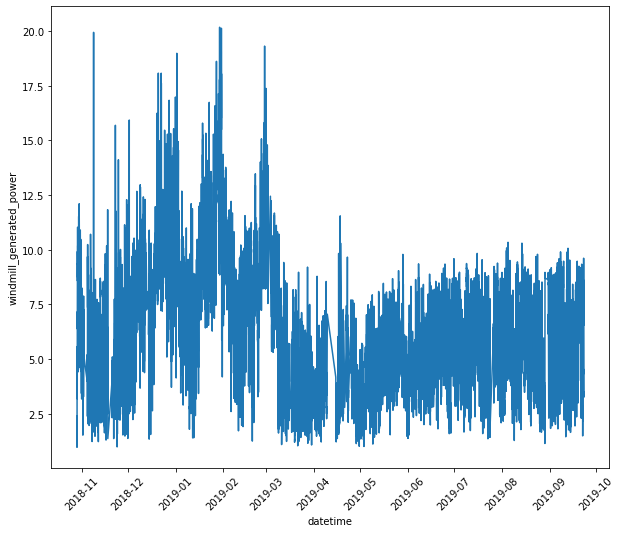

In [25]:
plt.figure(figsize=(10,8.5))
sns.lineplot(data=selected_dates_data,x = 'datetime',y='windmill_generated_power' )
plt.xticks(rotation=45)

In [26]:
def plot_univariate(colname,df,isCat=False):
    sns.set_style("whitegrid")
    sns.set_context("notebook")
    if isCat == False :
        fig,ax = plt.subplots(1,2,figsize=(15,5))
        fig.suptitle(f'{colname}')
        sns.boxplot(df[colname],ax=ax[1]).set(title='Boxplot')
        sns.distplot(df[colname],bins=20,ax=ax[0]).set(title='Distribution')
        print(f'{colname} min {df[colname].min()} and max {df[colname].max()}')
        #Let's check skewness of balance
        print(f'{colname} skewness: {df[colname].skew()}')
    else:
        fig,ax = plt.subplots(1,1,figsize=(10,5))
        fig.suptitle(f'{colname}')
        sns.countplot(df[colname],ax=ax).set(title='Count')
    
    num_of_na = df[colname].isna().sum()
    percentage = num_of_na/df[colname].shape[0]
    print(f'Number of null values: {num_of_na} missung percent {percentage}%')

In [27]:
sorted_by_datetime.columns

Index(['datetime', 'wind_speed', 'atmospheric_temperature',
       'shaft_temperature', 'blades_angle', 'gearbox_temperature',
       'engine_temperature', 'motor_torque', 'generator_temperature',
       'atmospheric_pressure', 'area_temperature', 'windmill_body_temperature',
       'wind_direction', 'resistance', 'rotor_torque', 'turbine_status',
       'cloud_level', 'blade_length', 'blade_breadth', 'windmill_height',
       'windmill_generated_power'],
      dtype='object')

wind_speed min -496.2110288895765 and max 601.4556703619595
wind_speed skewness: -0.06047716509377811
Number of null values: 273 missung percent 0.009680851063829788%


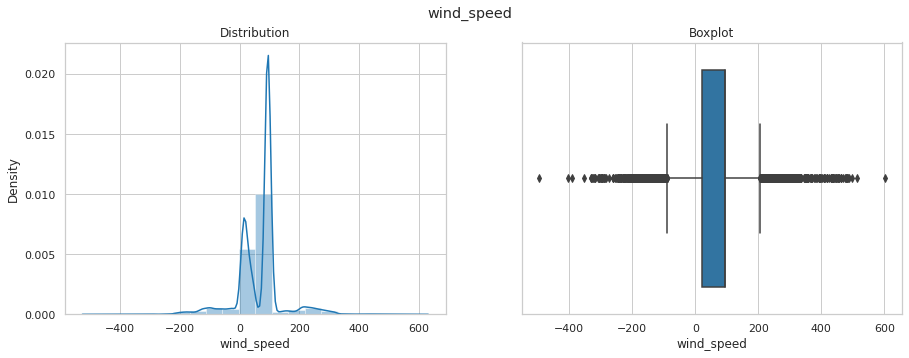

In [94]:
plot_univariate(new_col_names[1],sorted_by_datetime)

In [95]:
plot_univariate(new_col_names[2],sorted_by_datetime)

atmospheric_temperature min -99.0 and max 80.2174435198848
atmospheric_temperature skewness: -1.6748952424115802
Number of null values: 3450 missung percent 0.12234042553191489%


shaft_temperature min -99.0 and max 169.82045511554261
shaft_temperature skewness: -2.525168271068568
Number of null values: 2 missung percent 7.092198581560284e-05%


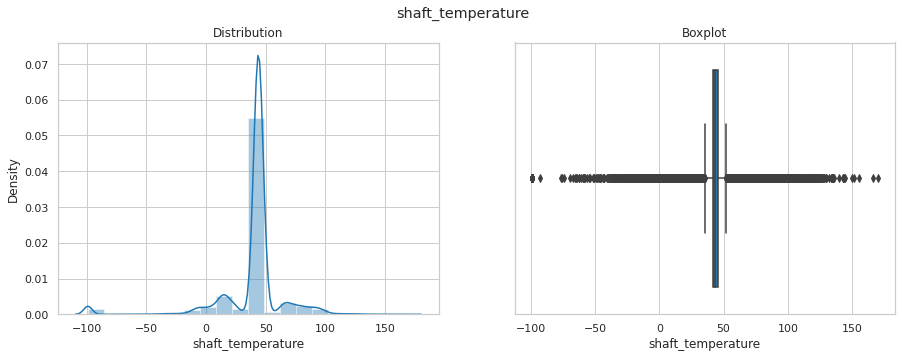

In [96]:
plot_univariate(new_col_names[3],sorted_by_datetime)

blades_angle min -146.2595426954871 and max 165.93212322658664
blades_angle skewness: -0.6521221850937268
Number of null values: 216 missung percent 0.007659574468085106%


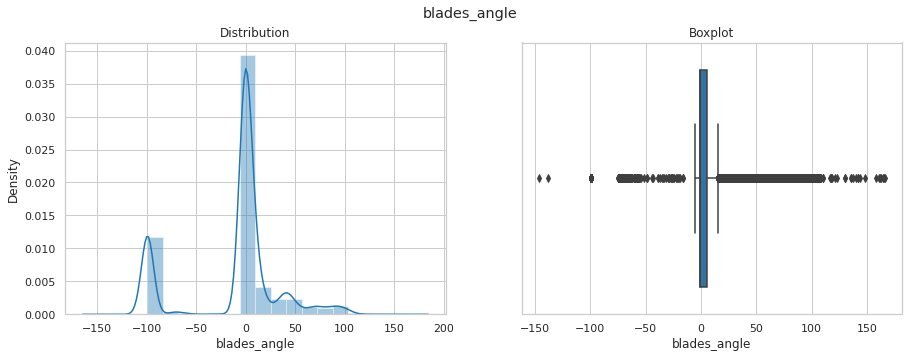

In [97]:
plot_univariate(new_col_names[4],sorted_by_datetime)

gearbox_temperature min -244.9740978349033 and max 999.0
gearbox_temperature skewness: 0.8868464412601692
Number of null values: 1 missung percent 3.546099290780142e-05%


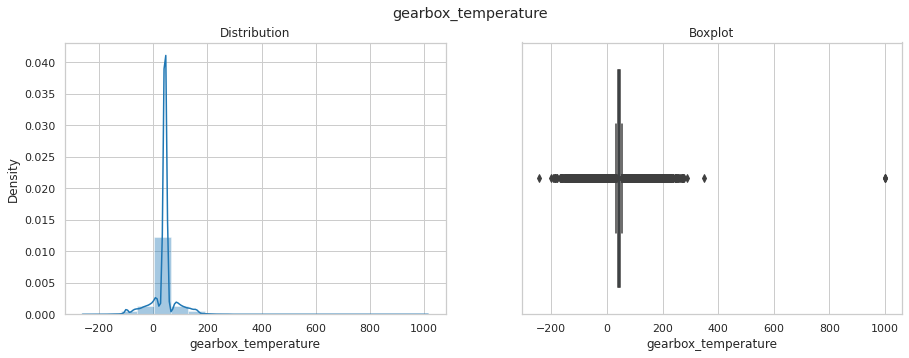

In [98]:
plot_univariate(new_col_names[5],sorted_by_datetime)

engine_temperature min 3.167151020862013 and max 50.0
engine_temperature skewness: -3.9447756085795613
Number of null values: 12 missung percent 0.000425531914893617%


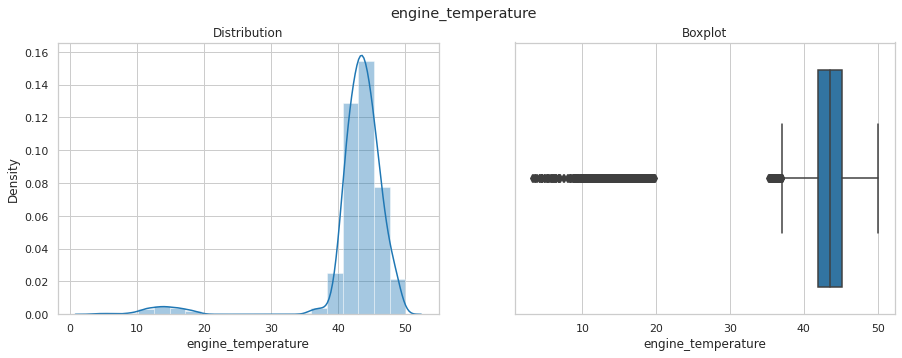

In [100]:
plot_univariate(new_col_names[6],sorted_by_datetime)

motor_torque min 500.0 and max 3000.0
motor_torque skewness: 0.034257515225989583
Number of null values: 24 missung percent 0.000851063829787234%


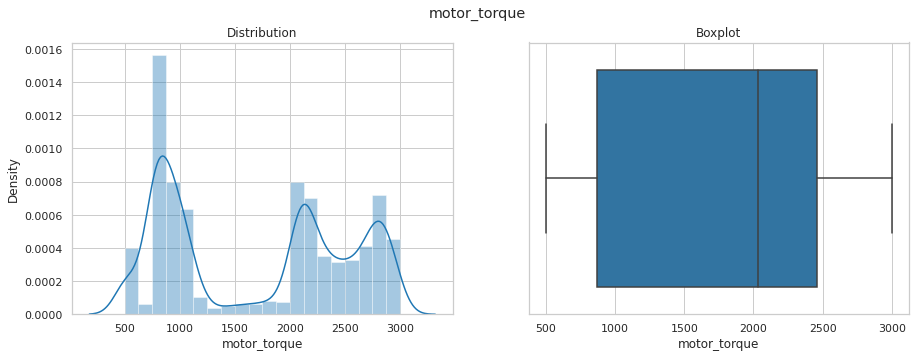

In [101]:
plot_univariate(new_col_names[7],sorted_by_datetime)

generator_temperature min 33.89377879070237 and max 100.0
generator_temperature skewness: -0.1908094021113418
Number of null values: 12 missung percent 0.000425531914893617%


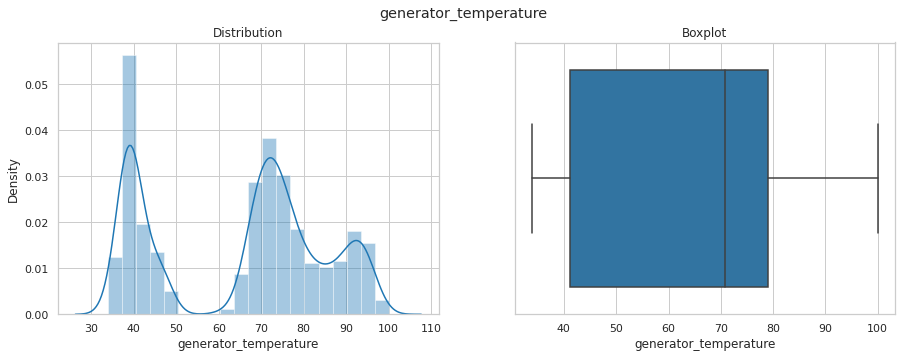

In [102]:
plot_univariate(new_col_names[8],sorted_by_datetime)

atmospheric_pressure min -1188624.1314124365 and max 1272551.8952618127
atmospheric_pressure skewness: 0.056670932048168886
Number of null values: 2707 missung percent 0.09599290780141843%


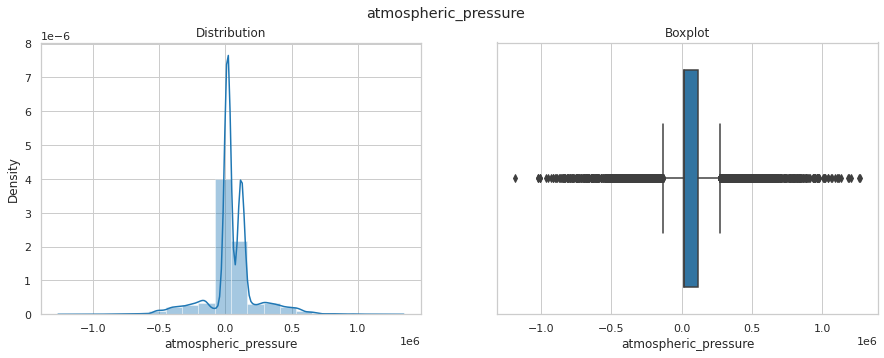

In [103]:
plot_univariate(new_col_names[9],sorted_by_datetime)

area_temperature min -30.0 and max 55.0
area_temperature skewness: -0.625424311186454
Number of null values: 0 missung percent 0.0%


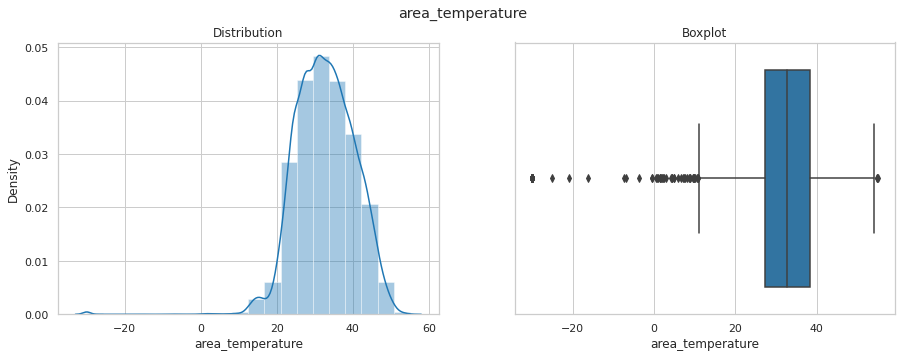

In [105]:
plot_univariate(new_col_names[10],sorted_by_datetime)

windmill_body_temperature min -999.0 and max 323.0
windmill_body_temperature skewness: -2.2368321720421656
Number of null values: 2363 missung percent 0.08379432624113475%


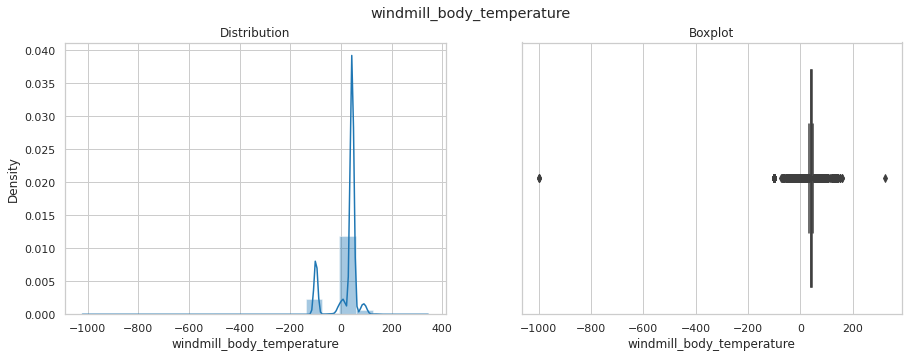

In [106]:
plot_univariate(new_col_names[11],sorted_by_datetime)

wind_direction min 0.0 and max 569.9664787747236
wind_direction skewness: 0.17194161343976405
Number of null values: 5103 missung percent 0.18095744680851064%


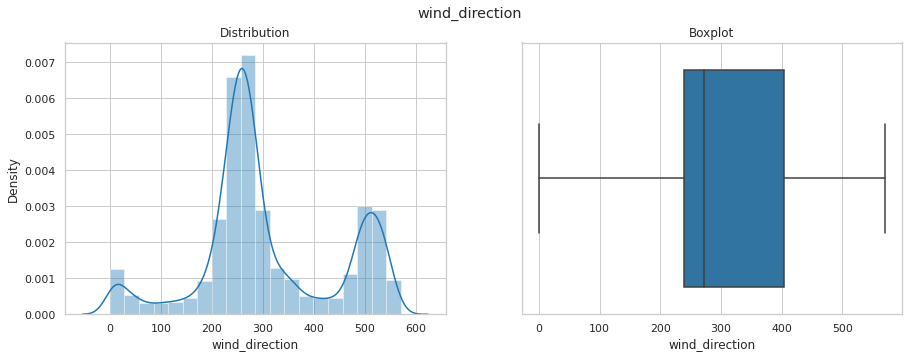

In [107]:
plot_univariate(new_col_names[12],sorted_by_datetime)

resistance min -1005.2229882601667 and max 4693.481933137124
resistance skewness: -0.6978086536252314
Number of null values: 1 missung percent 3.546099290780142e-05%


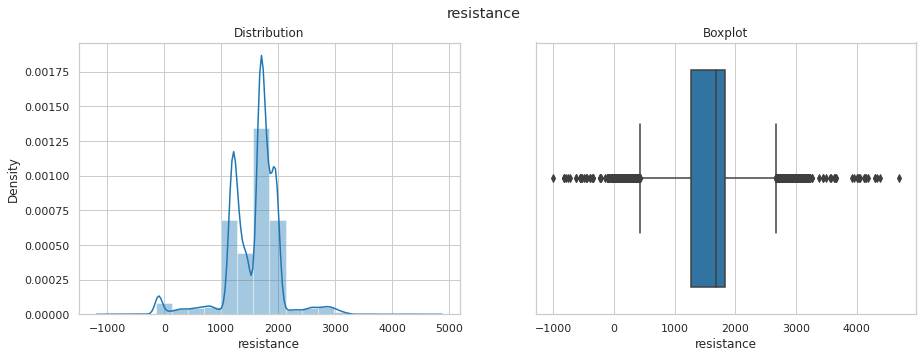

In [109]:
plot_univariate(new_col_names[13],sorted_by_datetime)

rotor_torque min -136.73221690705606 and max 236.88326419901017
rotor_torque skewness: -1.030947445559829
Number of null values: 572 missung percent 0.02028368794326241%


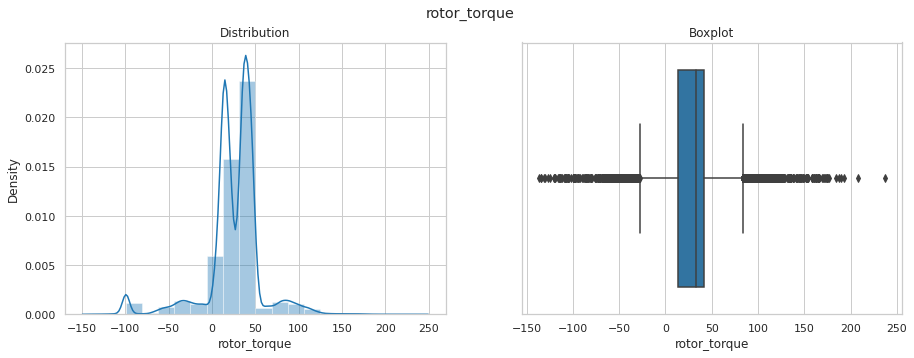

In [113]:
plot_univariate(new_col_names[14],sorted_by_datetime)

blade_length min -99.0 and max 18.209800144412974
blade_length skewness: -8.608357540280007
Number of null values: 5093 missung percent 0.18060283687943263%


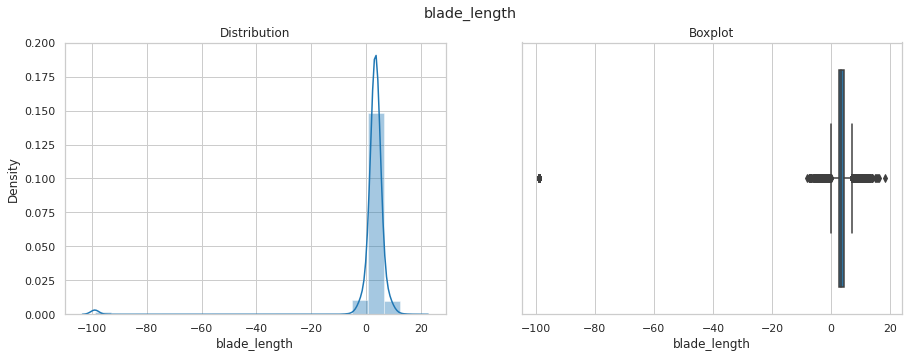

In [114]:
plot_univariate(new_col_names[17],sorted_by_datetime)

blade_breadth min 0.2001109964963546 and max 0.4999752685352868
blade_breadth skewness: -0.19340131892159365
Number of null values: 0 missung percent 0.0%


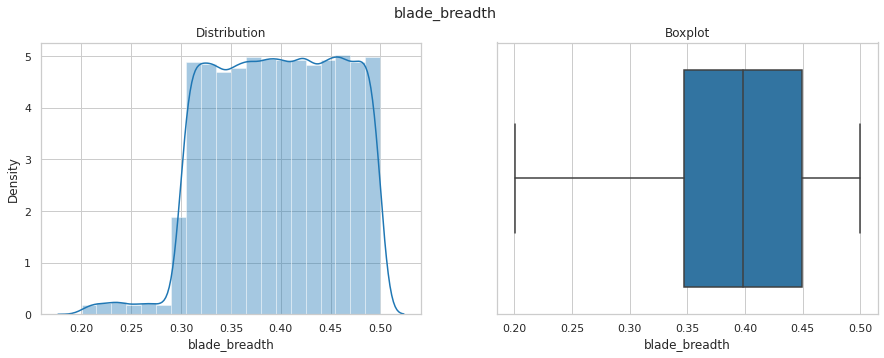

In [115]:
plot_univariate(new_col_names[18],sorted_by_datetime)

windmill_height min -30.295252920580417 and max 78.35133528318087
windmill_height skewness: -0.11328013490170277
Number of null values: 543 missung percent 0.01925531914893617%


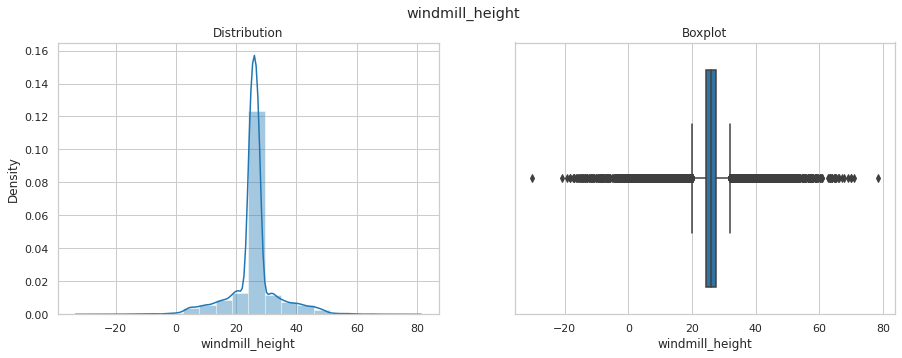

In [116]:
plot_univariate(new_col_names[19],sorted_by_datetime)

windmill_generated_power min 0.9623049455000005 and max 20.17535791666668
windmill_generated_power skewness: 0.6889352977438491
Number of null values: 207 missung percent 0.0073404255319148935%


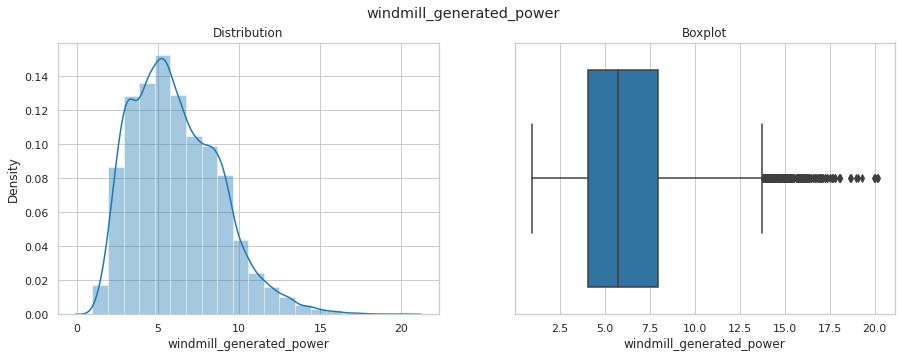

In [117]:
plot_univariate(new_col_names[20],sorted_by_datetime)

In [44]:
# Categorical data

Number of null values: 1759 missung percent 0.0623758865248227%


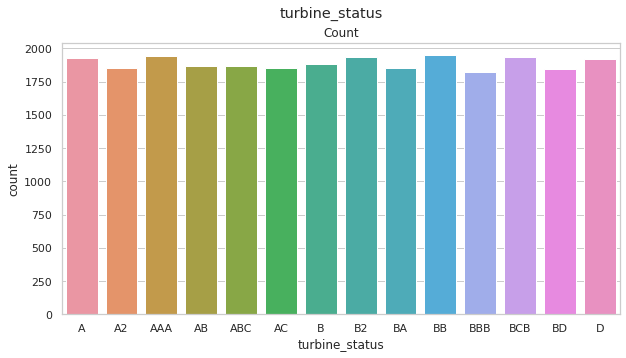

In [118]:
plot_univariate(new_col_names[15],sorted_by_datetime,True)

Number of null values: 276 missung percent 0.00978723404255319%


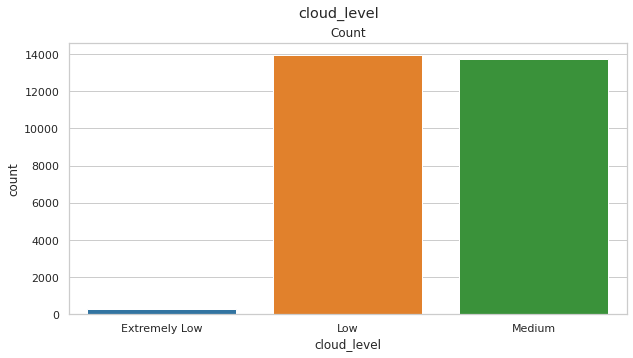

In [119]:
plot_univariate(new_col_names[16],sorted_by_datetime,True)



1.  As looking at data most of the numerical data are skewed.
2.  And we have missing values.
3.  So first we fill the numerical missing values with median.
4. cloud level, extremly low case is very less data



**Bi-variate**

In [28]:
sorted_by_datetime = sorted_by_datetime.drop(columns=['datetime'])

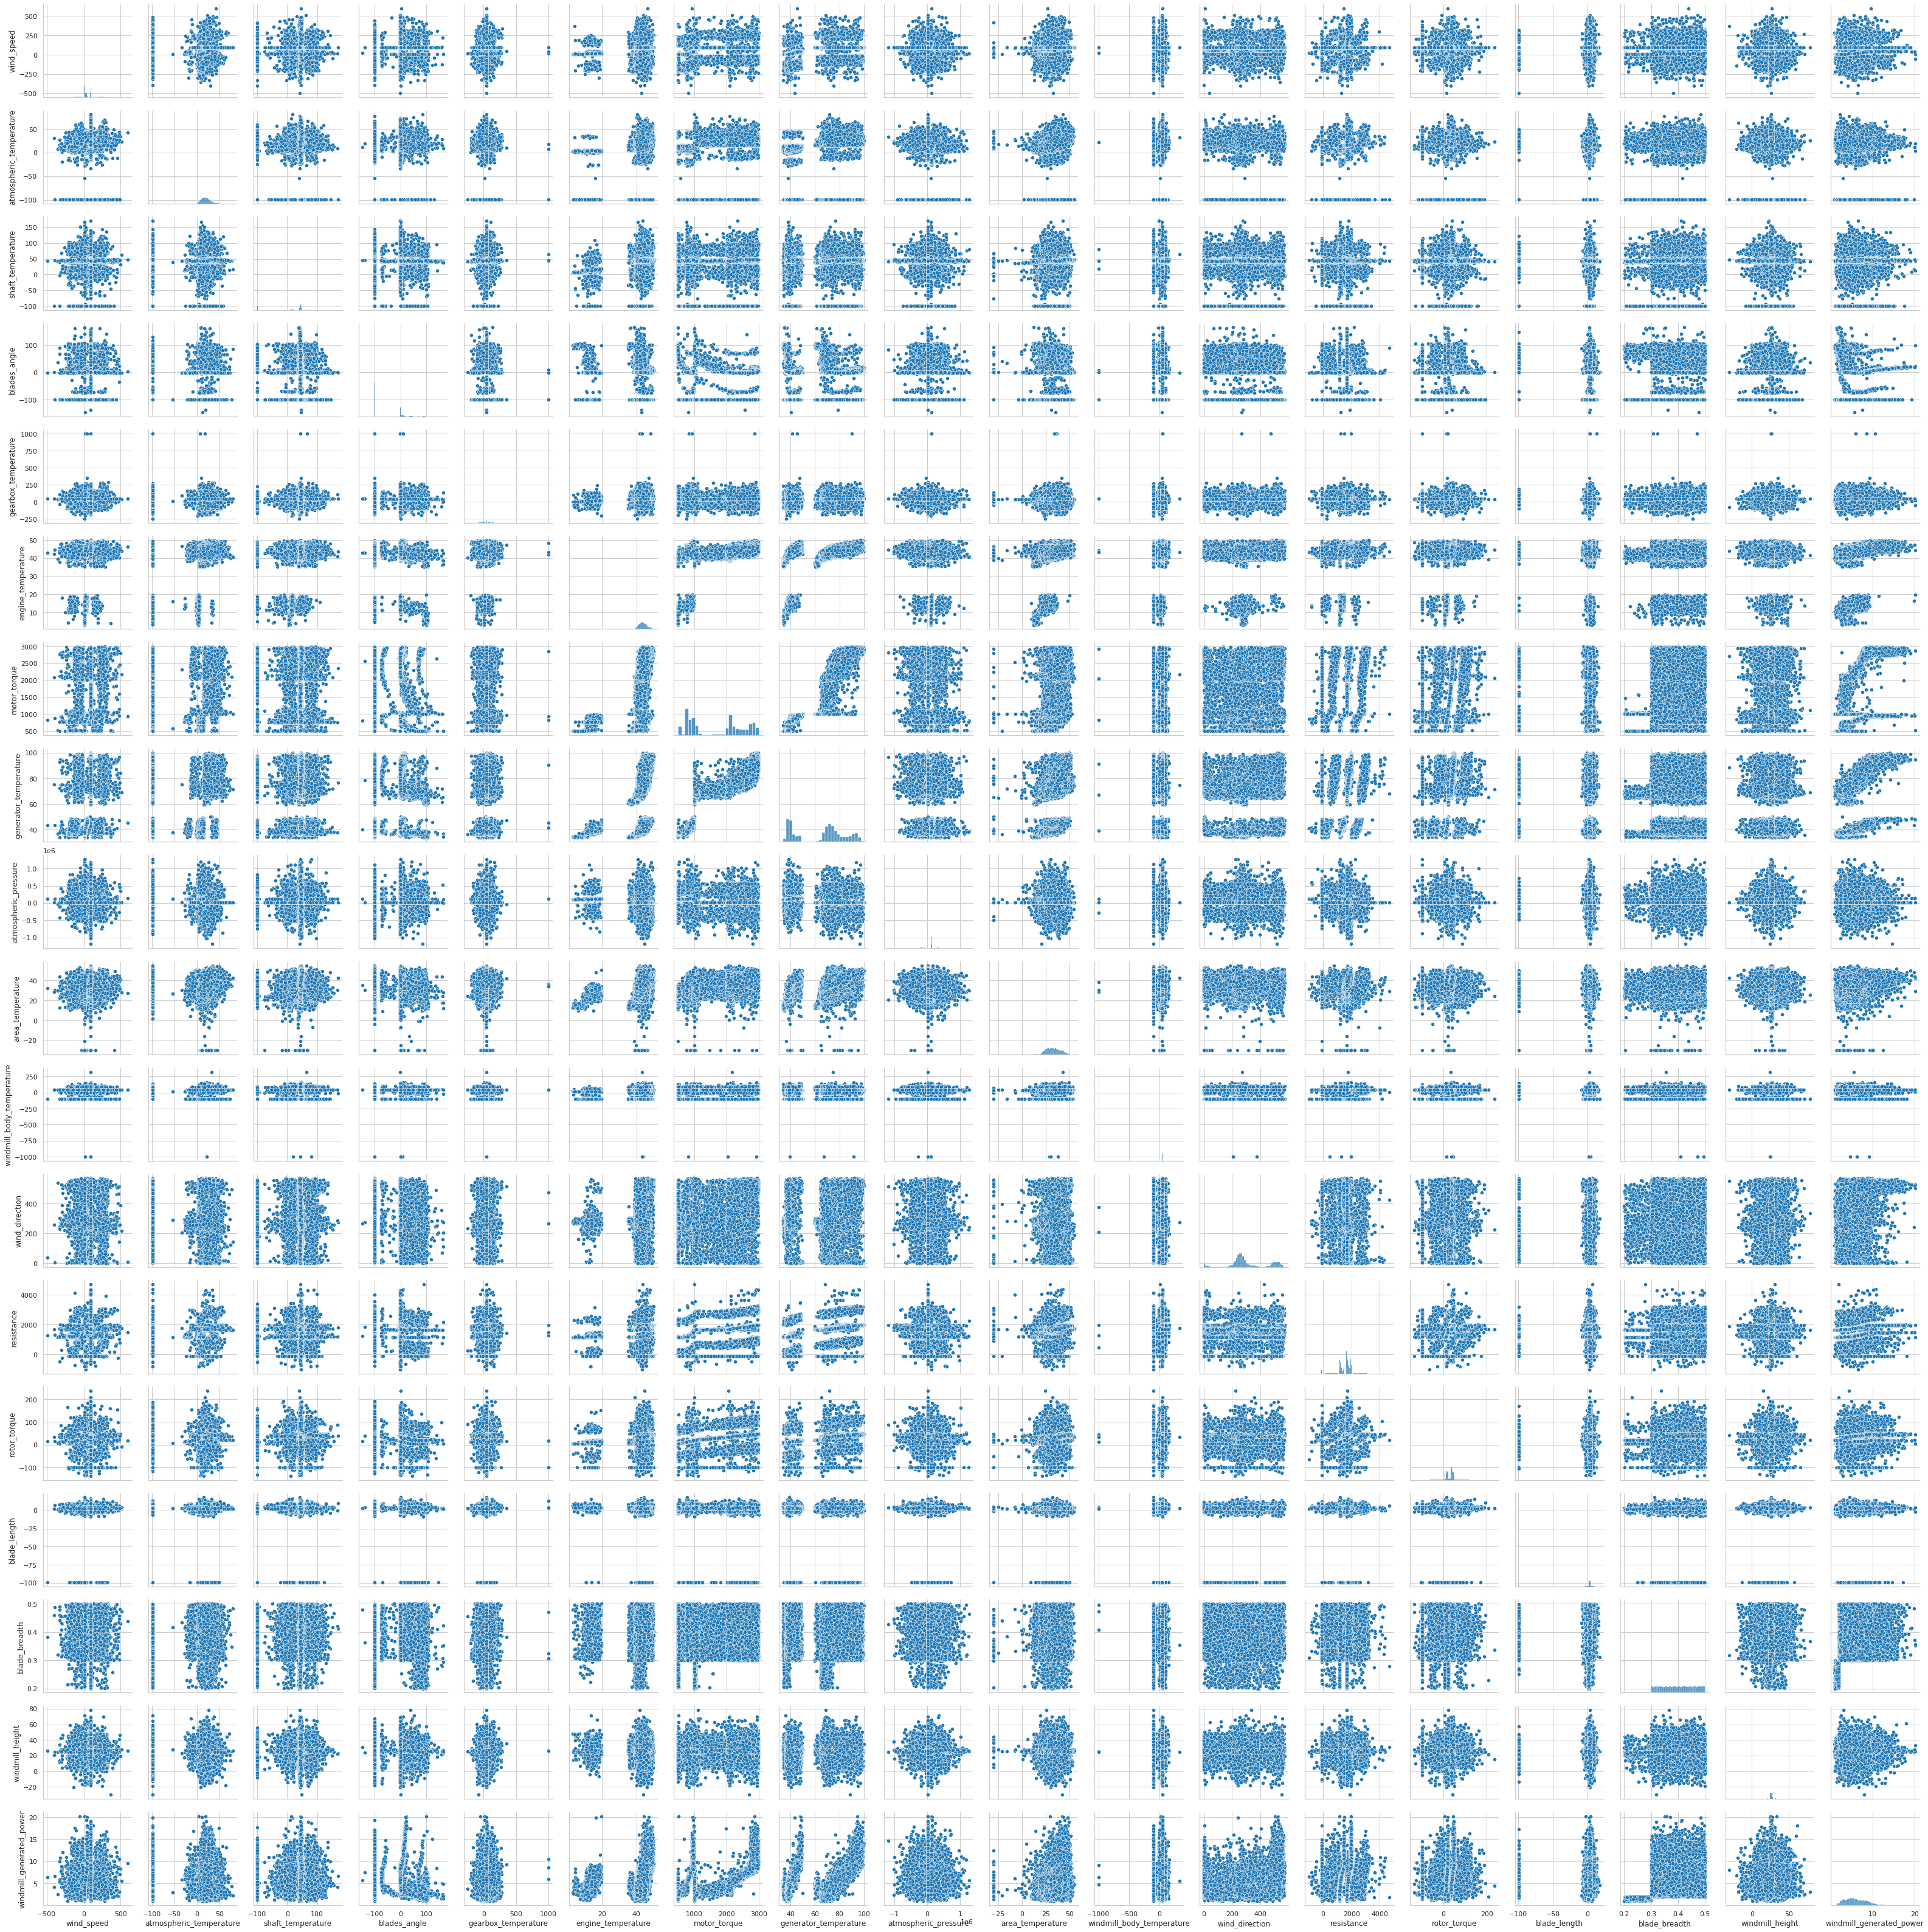

In [120]:
sns.pairplot(sorted_by_datetime)

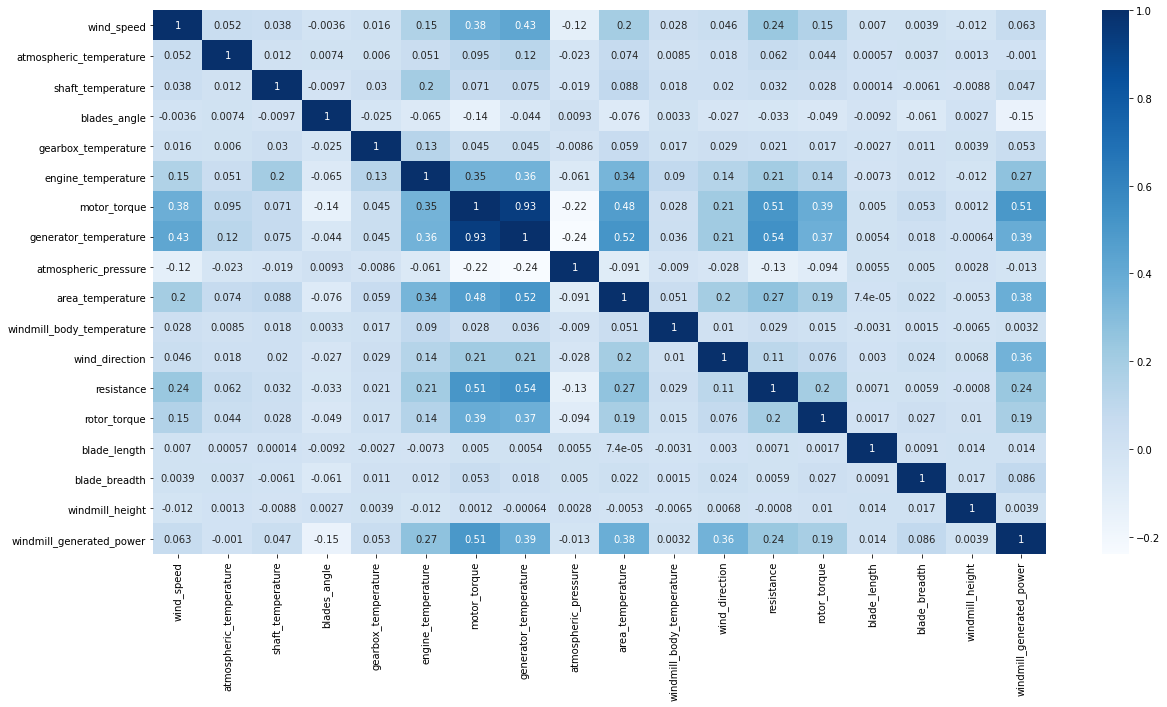

In [29]:
corr = train_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='Blues',)

**Data cleaning**

In [30]:
 # we have around 28K samples and we got 22K missing samples.
 # And we have observed that most of the data are skewed.
 # So impute numerical missing data with median.
 #And impute categorical missing data with most occurd values. 

In [130]:
sorted_by_datetime = sorted_by_datetime[sorted_by_datetime.windmill_generated_power.notna()]
train_df.shape

(28200, 21)

In [131]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder

In [132]:
numeric_cols = sorted_by_datetime.drop(columns=['windmill_generated_power','cloud_level','turbine_status']).columns
print(numeric_cols)
cat_cols = ['cloud_level','turbine_status']

Index(['wind_speed', 'atmospheric_temperature', 'shaft_temperature',
       'blades_angle', 'gearbox_temperature', 'engine_temperature',
       'motor_torque', 'generator_temperature', 'atmospheric_pressure',
       'area_temperature', 'windmill_body_temperature', 'wind_direction',
       'resistance', 'rotor_torque', 'blade_length', 'blade_breadth',
       'windmill_height'],
      dtype='object')


In [133]:
#fill nan by median
# sorted_by_datetime = sorted_by_datetime.fillna(sorted_by_datetime[numeric_cols].meadin())

In [134]:
simple_impute = SimpleImputer(strategy='median')
simple_impute.fit(sorted_by_datetime[numeric_cols].values)
num_imputedt_data = simple_impute.transform(sorted_by_datetime[numeric_cols].values)
num_imputedt_data.shape,num_imputedt_data.dtype

((27993, 17), dtype('float64'))

In [135]:
cat_simple_impute = SimpleImputer(strategy='most_frequent')
cat_simple_impute.fit(sorted_by_datetime[cat_cols].values)
cat_imputedt_data = cat_simple_impute.transform(sorted_by_datetime[cat_cols].values)
cat_imputedt_data.shape,cat_imputedt_data.dtype

((27993, 2), dtype('O'))

In [136]:
# concate numeric and categorical
concate_data_df = pd.concat([pd.DataFrame(num_imputedt_data,columns=numeric_cols),pd.DataFrame(cat_imputedt_data,columns=cat_cols)],axis=1)
concate_data_df['windmill_generated_power'] = sorted_by_datetime.windmill_generated_power.values.tolist()
concate_data_df.head()

wind_speed  atmospheric_temperature  ...  turbine_status  windmill_generated_power
0  -22.785291                44.376537  ...              AC                  2.212693
1  -86.585077                16.105033  ...              B2                  2.222945
2  292.003822                30.666463  ...              BB                  2.347810
3   99.417341                35.487108  ...               B                  2.161460
4   97.694882                41.479293  ...              BD                  1.913490

[5 rows x 20 columns]

In [137]:
len(sorted_by_datetime.windmill_generated_power.values.tolist()),concate_data_df.shape

(27993, (27993, 20))

In [138]:
# After filling nan
concate_data_df.isna().sum()

wind_speed                   0
atmospheric_temperature      0
shaft_temperature            0
blades_angle                 0
gearbox_temperature          0
engine_temperature           0
motor_torque                 0
generator_temperature        0
atmospheric_pressure         0
area_temperature             0
windmill_body_temperature    0
wind_direction               0
resistance                   0
rotor_torque                 0
blade_length                 0
blade_breadth                0
windmill_height              0
cloud_level                  0
turbine_status               0
windmill_generated_power     0
dtype: int64

In [139]:
enco =OrdinalEncoder()
enco.fit(concate_data_df[cat_cols])
concate_data_df[cat_cols] = enco.transform(concate_data_df[cat_cols])

In [140]:
concate_data_df.head(10)

wind_speed  ...  windmill_generated_power
0  -22.785291  ...                  2.212693
1  -86.585077  ...                  2.222945
2  292.003822  ...                  2.347810
3   99.417341  ...                  2.161460
4   97.694882  ...                  1.913490
5   95.758092  ...                  2.393622
6   98.667387  ...                  2.321825
7   96.679750  ...                  1.479235
8   96.575185  ...                  1.165717
9  284.911697  ...                  0.962305

[10 rows x 20 columns]

**Base model**

Without handling outlier.
Scaling is done

In [141]:
print(concate_data_df.shape)
df_cols = [*numeric_cols,*cat_cols] + ['windmill_generated_power']

(27993, 20)


In [142]:
# std_scaler = StandardScaler()
# std_scaler.fit(concate_data_df.values)
# concate_data_df[df_cols] = std_scaler.transform(concate_data_df.values)

In [179]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats.stats import pearsonr
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import StackingRegressor

import lightgbm
import xgboost as xgb


In [180]:
def measureError(y_test,y_pred,X_test):
    # Measuring error
    mse = mean_squared_error(y_test,y_pred)
    r2Score = r2_score(y_test,y_pred)
    return (mse,r2Score)

In [181]:
def get_saticking():
    level0 = []
    level0.append(('SVR',SVR()))
    level0.append(('DT',DecisionTreeRegressor(random_state=123)))
    level0.append(('RF',DecisionTreeRegressor(random_state=123)))
    level0.append(('KNN',KNeighborsRegressor()))
    level0.append(('GB',GradientBoostingRegressor()))
    level1 = lightgbm.LGBMRegressor()
    model = StackingRegressor(level0,final_estimator=level1,cv=5)
    return model



In [189]:
def get_models():
    models = []
    # models.append(('SVR',SVR()))
    models.append(('DT',DecisionTreeRegressor(random_state=123)))
    models.append(('RF',DecisionTreeRegressor(random_state=123)))
    # models.append(('KNN',KNeighborsRegressor()))
    models.append(('GB',GradientBoostingRegressor()))
    models.append(('LGBM',lightgbm.LGBMRegressor()))
    models.append(('XGB',xgb.XGBRegressor()))
    models.append(('Stacking',get_saticking()))
    return models

In [190]:
def split_data(dataframe, train_size=0.7):
    X = dataframe.iloc[:,:-1]
    y = dataframe.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = train_size, random_state= 123)
    print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
    return (X_train,X_test,y_train,y_test)

In [191]:
X_train,X_test,y_train,y_test = split_data(concate_data_df)

(19595, 19) (8398, 19) (19595,) (8398,)


In [192]:
result_dict ={'model_name':[],
            'corrcoeff':[],
            'p_val':[],
            'MSE': [],
            'R2_score': []
           }

In [193]:
def build_base_models(X_train,X_test,y_train,y_test):
    models = get_models()
    fig, ax = plt.subplots(1,len(models))
    index = 0
    for model_name, model in models:
        pipeline = Pipeline(steps=[('scale',PowerTransformer()),(f'{model_name}',model)])
        final_model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())
        final_model.fit(X_train,y_train)
        pred = final_model.predict(X_test)
        corr, p_val = pearsonr(y_test,pred)
        # Measuring error
        mse, r2_score = measureError(y_test,pred,X_test)
        result_dict['model_name'].append(model_name)
        result_dict['corrcoeff'].append(corr)
        result_dict['p_val'].append(p_val)
        result_dict['MSE'].append(mse)
        result_dict['R2_score'].append(r2_score)
        sns.jointplot(y_test,pred,ax=ax[index],kind='reg')
        index = index + 1
    return result_dict

[11:32:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


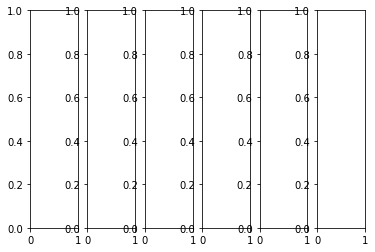

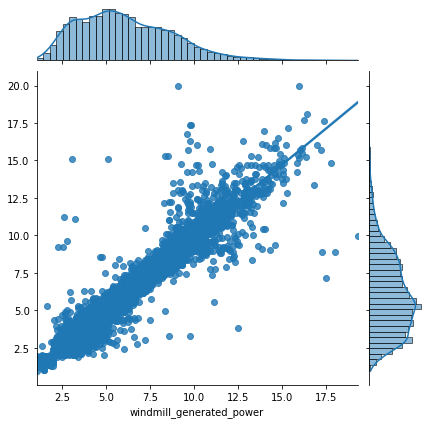

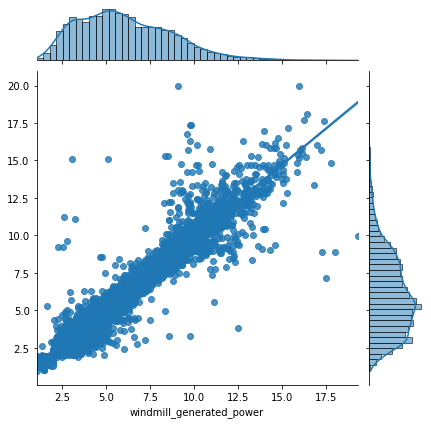

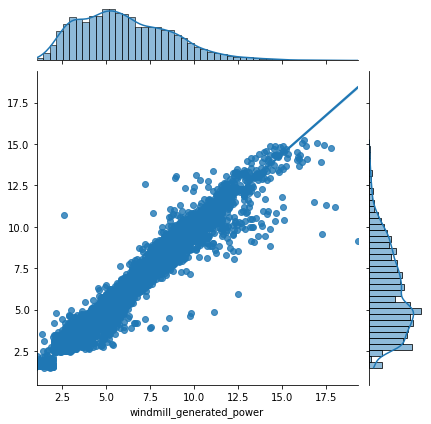

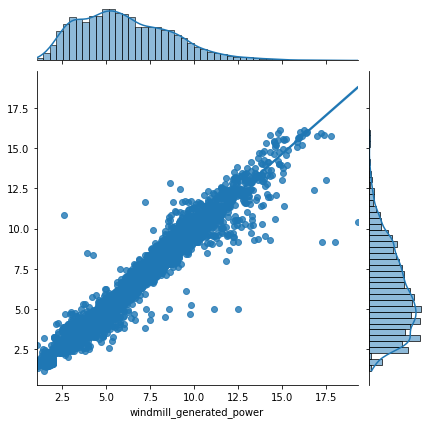

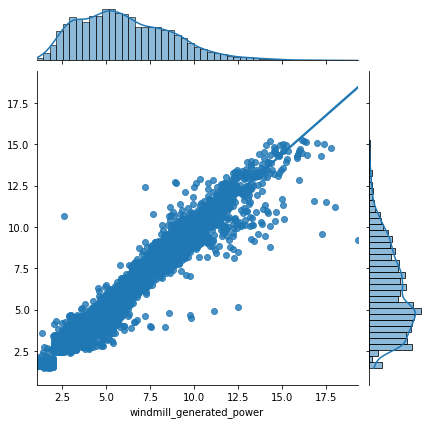

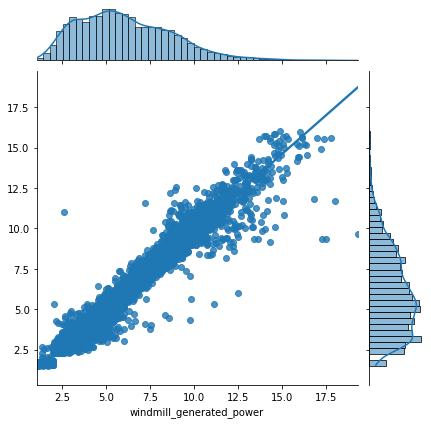

In [194]:
result_dict = build_base_models(X_train,X_test,y_train,y_test)

In [195]:
#model performancewith ouliers
witth_out_result = pd.DataFrame(result_dict)
witth_out_result

model_name  corrcoeff  p_val       MSE  R2_score
0         DT   0.960470    0.0  0.570257  0.920367
1         RF   0.960470    0.0  0.570257  0.920367
2         GB   0.973075    0.0  0.382734  0.946553
3       LGBM   0.979625    0.0  0.289179  0.959618
4        XGB   0.973501    0.0  0.376488  0.947426
5   Stacking   0.977516    0.0  0.318997  0.955454

**Handle outliers**

Handle outliers by capping techinque.

In [196]:
#Handling Outliers 
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    x = x.clip(lower=x.quantile(0.05))
    return x

In [197]:
#capping outliers in numerical data
fwd_cap_df = concate_data_df.apply(lambda x: outlier_capping(x), axis = 1)

[Text(0, 0, 'wind_speed'),
 Text(0, 0, 'atmospheric_temperature'),
 Text(0, 0, 'shaft_temperature'),
 Text(0, 0, 'blades_angle'),
 Text(0, 0, 'gearbox_temperature'),
 Text(0, 0, 'engine_temperature'),
 Text(0, 0, 'motor_torque'),
 Text(0, 0, 'generator_temperature'),
 Text(0, 0, 'atmospheric_pressure'),
 Text(0, 0, 'area_temperature'),
 Text(0, 0, 'windmill_body_temperature'),
 Text(0, 0, 'wind_direction'),
 Text(0, 0, 'resistance'),
 Text(0, 0, 'rotor_torque'),
 Text(0, 0, 'blade_length'),
 Text(0, 0, 'blade_breadth'),
 Text(0, 0, 'windmill_height'),
 Text(0, 0, 'cloud_level'),
 Text(0, 0, 'turbine_status'),
 Text(0, 0, 'windmill_generated_power')]

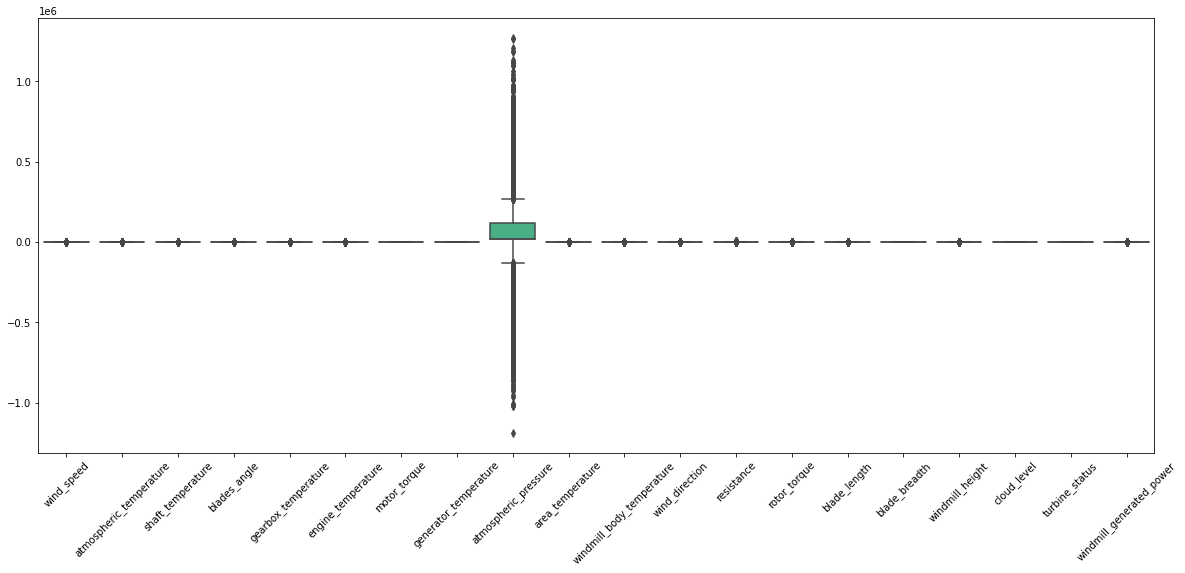

In [198]:
plt.figure(figsize=(20,8),)
boxplt = sns.boxplot(data=concate_data_df)
boxplt.set_xticklabels(boxplt.get_xticklabels(), rotation=45)

In [199]:
plt.figure(figsize=(20,8),)
boxplt = sns.boxplot(data=fwd_cap_df)
boxplt.set_xticklabels(boxplt.get_xticklabels(), rotation=45)

[Text(0, 0, 'wind_speed'),
 Text(0, 0, 'atmospheric_temperature'),
 Text(0, 0, 'shaft_temperature'),
 Text(0, 0, 'blades_angle'),
 Text(0, 0, 'gearbox_temperature'),
 Text(0, 0, 'engine_temperature'),
 Text(0, 0, 'motor_torque'),
 Text(0, 0, 'generator_temperature'),
 Text(0, 0, 'atmospheric_pressure'),
 Text(0, 0, 'area_temperature'),
 Text(0, 0, 'windmill_body_temperature'),
 Text(0, 0, 'wind_direction'),
 Text(0, 0, 'resistance'),
 Text(0, 0, 'rotor_torque'),
 Text(0, 0, 'blade_length'),
 Text(0, 0, 'blade_breadth'),
 Text(0, 0, 'windmill_height'),
 Text(0, 0, 'cloud_level'),
 Text(0, 0, 'turbine_status'),
 Text(0, 0, 'windmill_generated_power')]

(19595, 19) (8398, 19) (19595,) (8398,)
[11:39:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


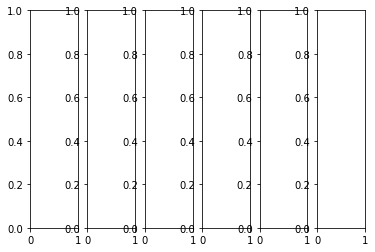

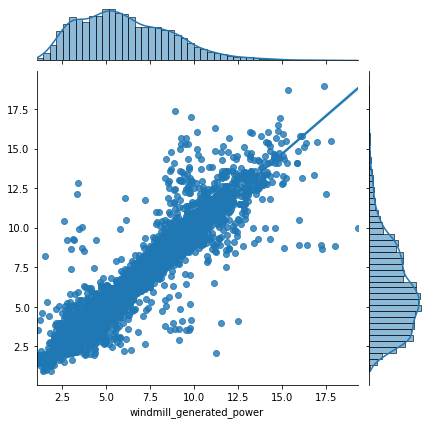

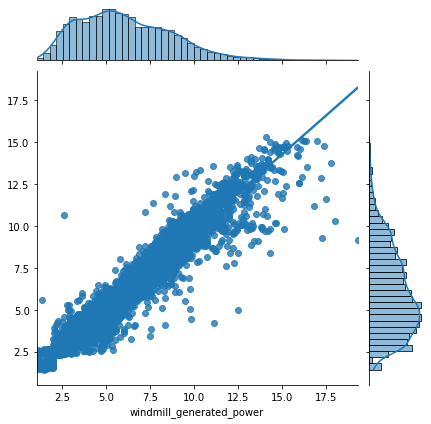

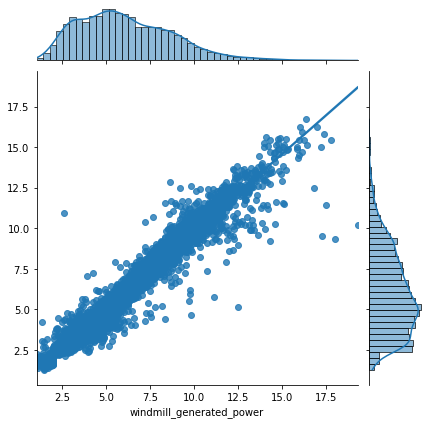

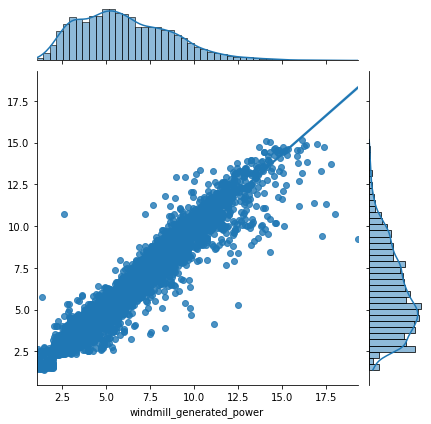

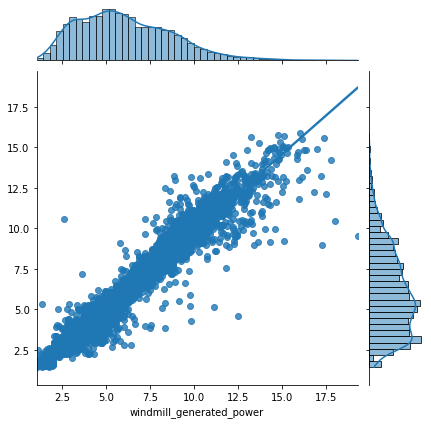

In [200]:
X_train,X_test,y_train,y_test = split_data(fwd_cap_df)
result_dict = build_base_models(X_train,X_test,y_train,y_test)

In [201]:
without_out_result = pd.DataFrame(result_dict)
without_out_result

model_name  corrcoeff  p_val       MSE  R2_score
0          DT   0.960470    0.0  0.570257  0.920367
1          RF   0.960470    0.0  0.570257  0.920367
2          GB   0.973075    0.0  0.382734  0.946553
3        LGBM   0.979625    0.0  0.289179  0.959618
4         XGB   0.973501    0.0  0.376488  0.947426
5    Stacking   0.977516    0.0  0.318997  0.955454
6          DT   0.950223    0.0  0.721550  0.899240
7          RF   0.950223    0.0  0.721550  0.899240
8          GB   0.966213    0.0  0.478097  0.933237
9        LGBM   0.977809    0.0  0.314984  0.956014
10        XGB   0.967133    0.0  0.465160  0.935043
11   Stacking   0.972625    0.0  0.387488  0.945890

(19595, 7) (8398, 7) (19595,) (8398,)
[11:51:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


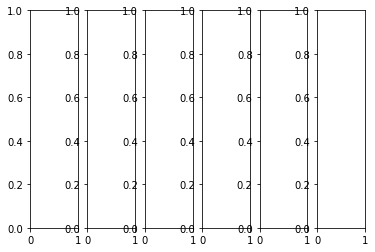

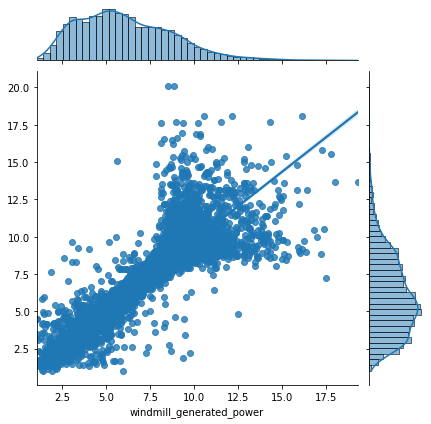

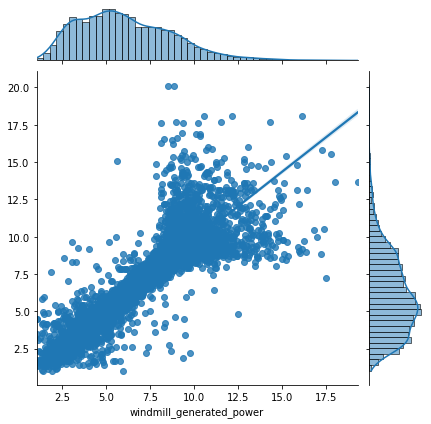

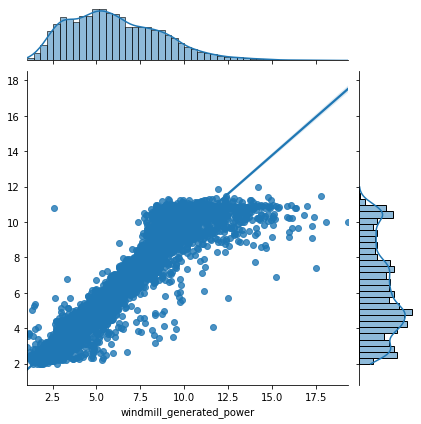

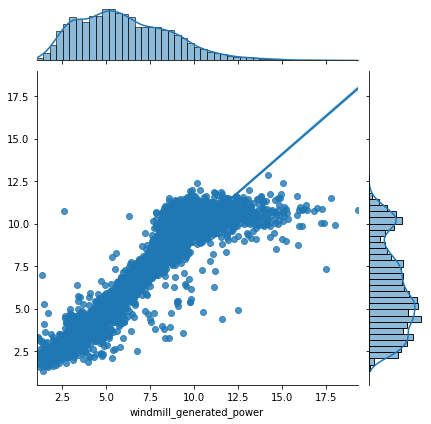

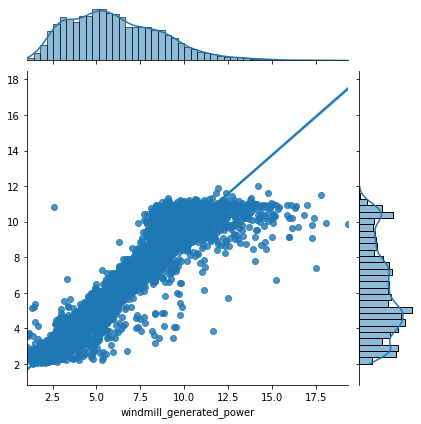

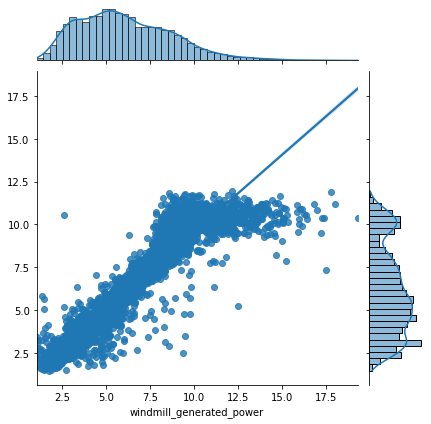

In [202]:
# Build model with selected features
selected_features = ['wind_speed','engine_temperature','motor_torque','area_temperature','wind_direction','resistance','rotor_torque','windmill_generated_power']
X_train,X_test,y_train,y_test = split_data(fwd_cap_df[selected_features])
result_dict = build_base_models(X_train,X_test,y_train,y_test)

In [203]:
sel_fet_without_out_result = pd.DataFrame(result_dict)
sel_fet_without_out_result

model_name  corrcoeff  p_val       MSE  R2_score
0          DT   0.960470    0.0  0.570257  0.920367
1          RF   0.960470    0.0  0.570257  0.920367
2          GB   0.973075    0.0  0.382734  0.946553
3        LGBM   0.979625    0.0  0.289179  0.959618
4         XGB   0.973501    0.0  0.376488  0.947426
5    Stacking   0.977516    0.0  0.318997  0.955454
6          DT   0.950223    0.0  0.721550  0.899240
7          RF   0.950223    0.0  0.721550  0.899240
8          GB   0.966213    0.0  0.478097  0.933237
9        LGBM   0.977809    0.0  0.314984  0.956014
10        XGB   0.967133    0.0  0.465160  0.935043
11   Stacking   0.972625    0.0  0.387488  0.945890
12         DT   0.909196    0.0  1.324491  0.815042
13         RF   0.909196    0.0  1.324491  0.815042
14         GB   0.941303    0.0  0.821257  0.885316
15       LGBM   0.948917    0.0  0.713973  0.900298
16        XGB   0.940719    0.0  0.829833  0.884119
17   Stacking   0.946812    0.0  0.742342  0.896336

In [85]:
params = {
    "num_leaves": np.arange(5,35,5),
    "max_depth": np.arange(5,50,5),
    "n_estimators": np.arange(100,1000,100),
    "min_child_samples": np.arange(5,50,5)
}
lgbm_rscv = RandomizedSearchCV(lightgbm.LGBMRegressor(),param_distributions=params,cv=10,verbose=1)
lgbm_rscv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           sile...
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'max_depth': array([ 5, 10, 15, 20,

In [86]:
lgbm_rscv.best_params_

{'max_depth': 5, 'min_child_samples': 5, 'n_estimators': 600, 'num_leaves': 15}

In [238]:
# Build best performed model
X_train,X_test,y_train,y_test = split_data(fwd_cap_df)
lgbm = lightgbm.LGBMRegressor(max_depth=9,n_estimators= 600,random_state=123)
# (max_depth=5, min_child_samples= 5, n_estimators= 600, num_leaves= 15, learning_rate=1e-1,random_state=123)
pipeline = Pipeline(steps=[('scale',PowerTransformer()),('LGBM',lgbm)])
final_model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())
final_model.fit(X_train,y_train)

(19595, 19) (8398, 19) (19595,) (8398,)


TransformedTargetRegressor(check_inverse=True, func=None, inverse_func=None,
                           regressor=Pipeline(memory=None,
                                              steps=[('scale',
                                                      PowerTransformer(copy=True,
                                                                       method='yeo-johnson',
                                                                       standardize=True)),
                                                     ('LGBM',
                                                      LGBMRegressor(boosting_type='gbdt',
                                                                    class_weight=None,
                                                                    colsample_bytree=1.0,
                                                                    importance_type='split',
                                                                    learning_rate=0.1,
                          

In [326]:
# Load test data

In [205]:
test_data.head()

tracking_id             datetime  ...  blade_breadth(m)  windmill_height(m)
0    WM_19817  2019-04-17 08:53:20  ...          0.403965           25.572431
1    WM_18723  2019-03-30 07:43:20  ...          0.444755           24.371823
2    WM_34552  2019-08-10 11:33:20  ...          0.387368           27.654677
3    WM_28570  2019-06-26 03:53:20  ...          0.450478           24.189426
4    WM_36934  2019-08-27 16:43:20  ...          0.368355            4.885440

[5 rows x 21 columns]

In [206]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tracking_id                    12086 non-null  object 
 1   datetime                       12086 non-null  object 
 2   wind_speed(m/s)                11960 non-null  float64
 3   atmospheric_temperature(°C)    10659 non-null  float64
 4   shaft_temperature(°C)          12085 non-null  float64
 5   blades_angle(°)                11980 non-null  float64
 6   gearbox_temperature(°C)        12085 non-null  float64
 7   engine_temperature(°C)         12081 non-null  float64
 8   motor_torque(N-m)              12075 non-null  float64
 9   generator_temperature(°C)      12081 non-null  float64
 10  atmospheric_pressure(Pascal)   10935 non-null  float64
 11  area_temperature(°C)           12085 non-null  float64
 12  windmill_body_temperature(°C)  11160 non-null 

In [207]:
test_data.isna().sum()

tracking_id                         0
datetime                            0
wind_speed(m/s)                   126
atmospheric_temperature(°C)      1427
shaft_temperature(°C)               1
blades_angle(°)                   106
gearbox_temperature(°C)             1
engine_temperature(°C)              5
motor_torque(N-m)                  11
generator_temperature(°C)           5
atmospheric_pressure(Pascal)     1151
area_temperature(°C)                1
windmill_body_temperature(°C)     926
wind_direction(°)                2160
resistance(ohm)                     0
rotor_torque(N-m)                 281
turbine_status                    797
cloud_level                       125
blade_length(m)                  2114
blade_breadth(m)                    0
windmill_height(m)                255
dtype: int64

In [208]:
test_df = drop_cols('tracking_id',test_data) 

(12086, 20)


In [209]:
for col in test_df.columns:
    if test_df[col].dtype == 'object' and col != 'datetime':
        test_df[col] = test_df[col].astype('category')

In [210]:
test_df = clean_col_names(test_df)

['datetime', 'wind_speed', 'atmospheric_temperature', 'shaft_temperature', 'blades_angle', 'gearbox_temperature', 'engine_temperature', 'motor_torque', 'generator_temperature', 'atmospheric_pressure', 'area_temperature', 'windmill_body_temperature', 'wind_direction', 'resistance', 'rotor_torque', 'turbine_status', 'cloud_level', 'blade_length', 'blade_breadth', 'windmill_height']
Index(['datetime', 'wind_speed', 'atmospheric_temperature',
       'shaft_temperature', 'blades_angle', 'gearbox_temperature',
       'engine_temperature', 'motor_torque', 'generator_temperature',
       'atmospheric_pressure', 'area_temperature', 'windmill_body_temperature',
       'wind_direction', 'resistance', 'rotor_torque', 'turbine_status',
       'cloud_level', 'blade_length', 'blade_breadth', 'windmill_height'],
      dtype='object')


In [211]:
test_df['datetime'] = pd.to_datetime(test_df.datetime)

In [212]:
test_df = drop_cols('datetime',test_df) 


(12086, 19)


In [213]:
test_num_imputedt_data = simple_impute.transform(test_df[numeric_cols].values)
test_num_imputedt_data.shape,test_num_imputedt_data.dtype

((12086, 17), dtype('float64'))

In [214]:
test_cat_imputedt_data = cat_simple_impute.transform(test_df[cat_cols].values)
test_cat_imputedt_data.shape,test_cat_imputedt_data.dtype

((12086, 2), dtype('O'))

In [215]:
# concate numeric and categorical
test_concate_data_df = pd.concat([pd.DataFrame(test_num_imputedt_data,columns=numeric_cols),pd.DataFrame(test_cat_imputedt_data,columns=cat_cols)],axis=1)
test_concate_data_df.head()

wind_speed  atmospheric_temperature  ...  cloud_level  turbine_status
0   94.324266                17.641186  ...       Medium              BA
1   10.088870                13.978119  ...       Medium               A
2  347.152090                31.423035  ...       Medium              B2
3   24.471997               -99.000000  ...          Low             BBB
4   96.997026                33.281836  ...          Low               A

[5 rows x 19 columns]

In [216]:
test_concate_data_df[cat_cols] = enco.transform(test_concate_data_df[cat_cols])

In [217]:
test_concate_data_df.head()
print(test_concate_data_df.shape)

(12086, 19)


In [239]:
test_y_hat = final_model.predict(test_concate_data_df)

In [240]:
final_submission = test_data[['tracking_id','datetime']]
final_submission['windmill_generated_power(kW/h)'] = test_y_hat

In [241]:
final_submission.head()

tracking_id             datetime  windmill_generated_power(kW/h)
0    WM_19817  2019-04-17 08:53:20                        2.475927
1    WM_18723  2019-03-30 07:43:20                        2.386198
2    WM_34552  2019-08-10 11:33:20                        3.373863
3    WM_28570  2019-06-26 03:53:20                        7.528039
4    WM_36934  2019-08-27 16:43:20                        3.574252

In [237]:
final_submission.to_csv(os.path.join(config_.basePath,'final_submission_13.csv'))

In [415]:
final_submission.shape

(12086, 3)